This notebook allows to look at the data produced when models are trained with the main.py program.

It allows to monitor in real time the training of the models when we run main.py.

It is also useful because it allows to look at the training data of any trained models when the training is done.

In [1]:
import torch
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset, Dataset
from torch.optim.lr_scheduler import ReduceLROnPlateau
from copy import deepcopy
from pathlib import Path
import torch.nn.functional as F
import random

In [2]:
device =  "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu


In [3]:
run = 1 # select here the run
H = 34 # select here the hidden layer size of the model you want to see 

In [4]:
K = 10 # Number of classes

class FCNeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.Matrix1 = nn.Linear(28**2, H)
        self.Matrix2 = nn.Linear(H, K)
        self.R = nn.ReLU()
    def forward(self,x):
        x = x.view(-1, 28**2)
        x = self.R(self.Matrix1(x))
        x = self.Matrix2(x)
        return x.squeeze()

In [5]:
#loading training data
model = FCNeuralNetwork().to(device)
model.load_state_dict(torch.load(f'runs/run{1}/H{H}/model.pt'))
train_squared_loss_numpy=np.load(f'runs/run{1}/H{H}/train_squared_loss_numpy.npy')
val_squared_loss_numpy=np.load(f'runs/run{1}/H{H}/val_squared_loss_numpy.npy')
train_zero_one_loss_numpy=np.load(f'runs/run{1}/H{H}/train_zero_one_loss_numpy.npy')
val_zero_one_loss_numpy=np.load(f'runs/run{1}/H{H}/val_zero_one_loss_numpy.npy')

In [6]:
print(f"epoch number:{train_squared_loss_numpy.shape[0]}")  #here we look at how many epochs have been done

epoch number:25


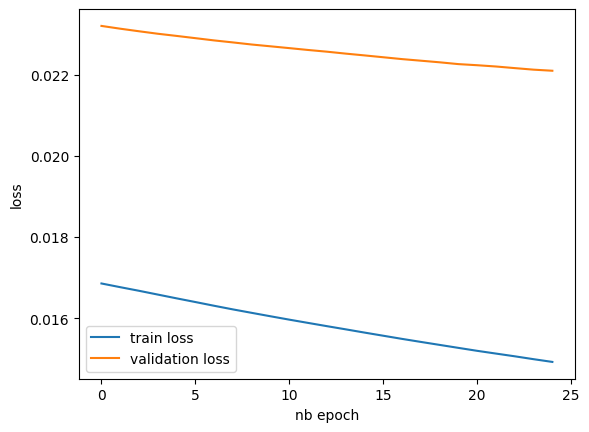

In [7]:
# here we plot the evolution of the train and val squared loss at each epoch.

plt.figure()
plt.plot(train_squared_loss_numpy, label='train loss')
plt.plot(val_squared_loss_numpy, label='validation loss')
plt.xlabel('nb epoch')
#plt.yscale("log")
plt.ylabel('loss')
plt.legend()

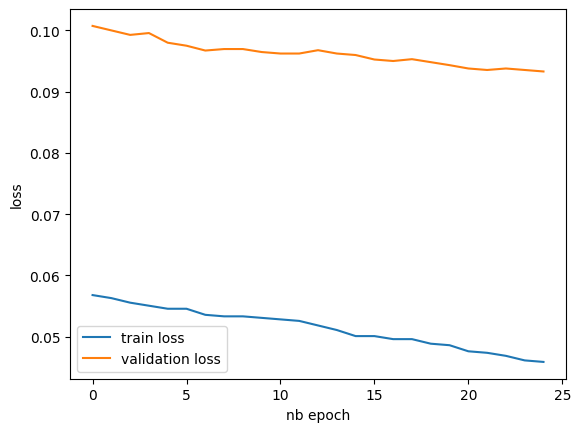

In [8]:
# here we plot the evolution of the train and val zero one loss at each epoch.

plt.figure()
plt.plot(train_zero_one_loss_numpy, label='train loss')
plt.plot(val_zero_one_loss_numpy, label='validation loss')
plt.xlabel('nb epoch')
#plt.yscale("log")
plt.ylabel('loss')
plt.legend()

In [9]:
print(train_zero_one_loss_numpy[-1]) #last train zero one loss

0.045882936507936505


In [10]:
print(val_zero_one_loss_numpy[-1]) #last test zero one loss

0.09329927898943424


In what follows we compute the train and test accuracy of the model obtained in the last epoch

In [11]:
class ImageDataset(Dataset):
    def __init__(self, x, y):
        self.x, self.y = x, y
        self.x = self.x / 255.  # We normalize the image amplitude between 0 and 1
        self.y = F.one_hot(self.y, num_classes=K).to(torch.float) # One hot encoding
    def __len__(self): 
        return self.x.shape[0]
    def __getitem__(self, ix): 
        return self.x[ix], self.y[ix]

In [12]:
x_train_subsampled=torch.load('dataset/x_train_subsampled.pt')
y_train_subsampled=torch.load('dataset/y_train_subsampled.pt')

x_test_subsampled=torch.load('dataset/x_test_subsampled.pt')
y_test_subsampled=torch.load('dataset/y_test_subsampled.pt')

train_dataset = ImageDataset(x_train_subsampled, y_train_subsampled)
test_dataset = ImageDataset(x_test_subsampled, y_test_subsampled)

In [13]:
# accuracy on the train dataset of the last model
n=0
for i in range(len(train_dataset)):
    if (torch.argmax(model(train_dataset[i][0].to(device))).item() == y_train_subsampled[i]):
        n+=1

print(f'accuracy = {n/len(train_dataset)}')

accuracy = 0.953


In [14]:
# accuracy on the test dataset of the last model
n=0
for i in range(len(test_dataset)):
    if (torch.argmax(model(test_dataset[i][0].to(device))).item() == y_test_subsampled[i]):
        n+=1

print(f'accuracy = {n/len(test_dataset)}')

accuracy = 0.907
